# A Quick Primer on gradients

- Visualizing gradients

- Develop an intuition to the underlying behavior

## Import libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Visualizing gradient vector fields $f(x,y), \overrightarrow{F}(x,y) = \frac{\partial f}{\partial x} \mathbf{i} + \frac{\partial f}{\partial y}\mathbf{j}$

## $f(x,y)=x-y$, $\overrightarrow{F}(x,y) = \mathbf{i-j}$

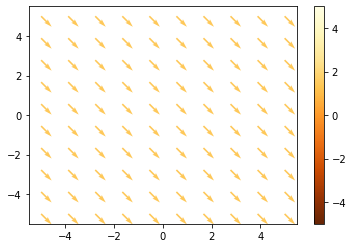

In [2]:
x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = 1
v = -1

def plot_quiver(x,y,u,v, norm_range=(-5,5), mag=None):
    plt.close()
    norm = matplotlib.colors.Normalize()
    norm.autoscale(norm_range)

    cm = matplotlib.cm.YlOrBr_r
    sm = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
    sm.set_array([])
    if mag is None:
        plt.quiver(x,y,u,v, color=cm(norm(np.sqrt(2))))
    else:
        plt.quiver(x,y,u,v, color=cm(mag))
    plt.colorbar(sm)
    plt.show()

plot_quiver(x,y,u,v)

## $f(x,y) = \sqrt{x^2 + y^2}$, $ \overrightarrow{F}(x,y) = \frac{x}{\sqrt{x^2 + y^2}}\mathbf{i}+\frac{y}{\sqrt{x^2 + y^2}}\mathbf{j}$

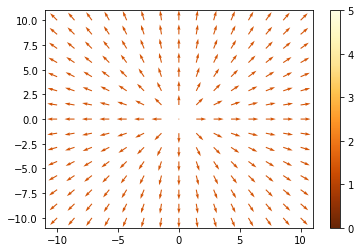

In [3]:
x,y = np.meshgrid(np.linspace(-10,10,15),np.linspace(-10,10,15))
eps = 1e-6
u = x/(np.sqrt(x**2 + y**2)+eps)
v = y/(np.sqrt(x**2 + y**2)+eps)

plot_quiver(x,y,u,v, norm_range=(0,5))

## $f(x,y) = ??$, $ \overrightarrow{F}(x,y) = -\frac{y}{\sqrt{x^2 + y^2}}\mathbf{i}+\frac{x}{\sqrt{x^2 + y^2}}\mathbf{j}$

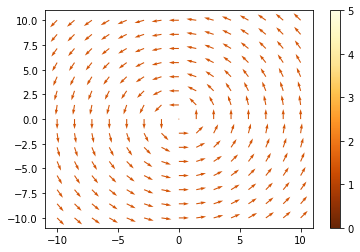

In [4]:
u = -y/(np.sqrt(x**2 + y**2)+eps)
v = x/(np.sqrt(x**2 + y**2)+eps)
plot_quiver(x,y,u,v, norm_range=(0,5))

## 3D vector plot

<ipython-input-5-4b5f231335ab>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


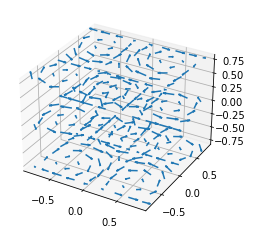

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))


    
ax.quiver(x, y, z, u, v, w, length=0.2)

plt.show()

## Gradient plots for various functions for choices (1-4)
### 1. $f(x,y) = \sin^3 x + \cos^3 y$,
### 2. $f(x,y) = xy$,
### 3. $f(x,y) = x^2+y^2$,
### 4. $f(x,y) = e^{-(x^2+y^2)}$

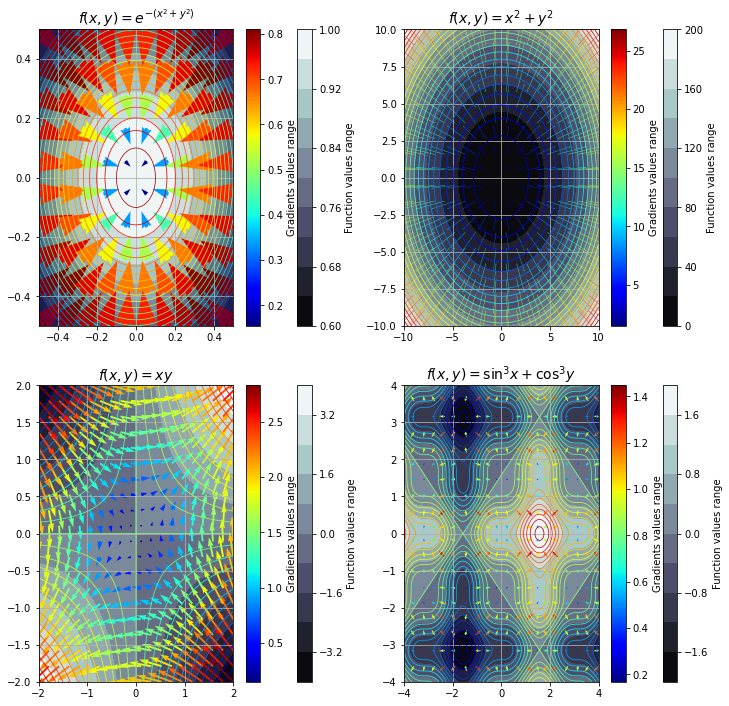

In [6]:
# Some scalar function of interest:
def sin3coc3(x, y):
    
        return np.power(np.sin(x), 3) + np.power(np.cos(y), 3)
def xy(x, y):
        return x*y

def x2y2(x, y):    
        return np.power(x, 2) + np.power(y, 2)

def ex2y2(x, y):    
        return np.exp(-(np.power(x, 2) + np.power(y, 2)))

zFuntion = {1: ex2y2, 
            2: x2y2, 
            3: xy,
            4: sin3coc3}

xMIN_MAX = {1: (-0.5, 0.5),
            2: (-10, 10),
            3: (-2, 2),
            4: (-4, 4)}

SPACING = {1: 10,
            2: 20,
            3: 20,
            4: 20}

fn_name = {1: "f(x,y) = e^{-(x^2+y^2)}",
2: "f(x,y) = x^2+y^2",
3: "f(x,y) = xy",
4: "f(x,y) = \sin^3 x + \cos^3 y",}



choice = 4

d_X, d_Y, d_Z, d_M = {}, {}, {}, {}
d_Xh, d_Yh, d_Zh, d_dZ = {}, {}, {}, {}

for ch in range(choice):
    # Grid for gradient:
    xmin, xmax = xMIN_MAX[ch+1]
    spacing = SPACING[ch+1]
    x = y = np.linspace(xmin, xmax, spacing)
    d_X[ch], d_Y[ch] = np.meshgrid(x, y)
    
    d_Z[ch] = zFuntion[ch+1](d_X[ch],d_Y[ch])
    
    # Compute gradient:
    d_dZ[ch] = np.gradient(d_Z[ch], x, y)
    
    # Gradient magnitude (arrow colors): 
    d_M[ch] = np.hypot(*d_dZ[ch])
    
    # Grid for contour:
    xh = yh = np.linspace(xmin, xmax, 400)
    d_Xh[ch], d_Yh[ch] = np.meshgrid(xh, yh)
    d_Zh[ch] = zFuntion[ch+1](d_Xh[ch], d_Yh[ch])

# Plotting gradient & contour:
fig, axe = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))

ch = 0
for row in axe:
    for col in row:
        fn_plt = col.contourf(d_Xh[ch], d_Yh[ch], d_Zh[ch], 10, cmap=plt.cm.bone)
        col.contour(d_Xh[ch], d_Yh[ch], d_Zh[ch], 30, cmap="jet", linewidths=0.75)
        grd_plt = col.quiver(d_X[ch], d_Y[ch], d_dZ[ch][1], d_dZ[ch][0], d_M[ch], 
                             cmap="jet", units='xy', pivot='tail', width=0.03, scale=5)
        #col.set_aspect("equal")  # Don't stretch the scale
        fn_cbar = fig.colorbar(fn_plt, ax=col)
        grd_cbar = fig.colorbar(grd_plt, ax=col)
        fn_cbar.set_label('Function values range')
        grd_cbar.set_label('Gradients values range')
        col.grid()
        col.set_title(fr'${fn_name[ch+1]}$', fontsize=14)
        #plt.colorbar()
        ch += 1
plt.show()